In [ ]:
!pip install scikit-learn
!pip install wordcloud
!pip install nltk
!pip install seaborn
!pip install unidecode

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import wordcloud
from nltk import tokenize
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
import unidecode


In [3]:
# nltk.download("all")
# nltk.download("ptb") 

In [4]:
# os.getcwd()

In [5]:
reviews = pd.read_csv("data/imdb-reviews-pt-br.csv")
reviews.head(5)

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [6]:
# # from sklearn.model_selection import train_test_split
# train, test, class_train, class_test = train_test_split(reviews.text_pt, reviews.sentiment, random_state = 42)

# # from sklearn.linear_model import LogisticRegression
# RegressionLogistic = LogisticRegression()
# RegressionLogistic.fit(train, class_train)
# acuracy = RegressionLogistic.score(test, class_test)
# print(acuracy)

In [7]:
reviews.sentiment.value_counts()

sentiment
neg    24765
pos    24694
Name: count, dtype: int64

In [8]:
classification = reviews['sentiment'].replace(['neg','pos'],[0,1])
reviews['classification'] = classification
reviews.head(5)

C:\Users\Flavio Lima\AppData\Local\Temp\ipykernel_25980\610877091.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  classification = reviews['sentiment'].replace(['neg','pos'],[0,1])


,id,text_en,text_pt,sentiment,classification
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [9]:
text = ['Assisti um filme maravilhoso','Assisti um filme muito bom','Filme péssimo']
vetorize = CountVectorizer(lowercase=False)
bag_of_words = vetorize.fit_transform(text)
vetorize.get_feature_names_out()

array(['Assisti', 'Filme', 'bom', 'filme', 'maravilhoso', 'muito',
       'péssimo', 'um'], dtype=object)

In [10]:
matrix_sparce = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorize.get_feature_names_out())
matrix_sparce

,Assisti,Filme,bom,filme,maravilhoso,muito,péssimo,um
0,1,0,0,1,1,0,0,1
1,1,0,1,1,0,1,0,1
2,0,1,0,0,0,0,1,0


In [11]:
# vetorize = CountVectorizer(lowercase=False)
#vetorize = CountVectorizer()
# vetorize = CountVectorizer(max_features=100)
# bag_of_words = vetorize.fit_transform(reviews.text_pt)
# bag_of_words.shape

In [12]:
vetorize = CountVectorizer(max_features=100)
bag_of_words = vetorize.fit_transform(reviews.text_pt)
bag_of_words.shape
train, test, class_train, class_test = train_test_split(bag_of_words, reviews.classification, random_state = 42)
RegressionLogistic = LogisticRegression(max_iter=100)
RegressionLogistic.fit(train, class_train)
acuracy = RegressionLogistic.score(test, class_test)
print(acuracy)

0.7119288313788921


In [13]:
vetorize = CountVectorizer(max_features=300)
bag_of_words = vetorize.fit_transform(reviews.text_pt)
bag_of_words.shape
train, test, class_train, class_test = train_test_split(bag_of_words, reviews.classification, random_state = 42)
RegressionLogistic = LogisticRegression(max_iter=300)
RegressionLogistic.fit(train, class_train)
acuracy = RegressionLogistic.score(test, class_test)
print(acuracy)

0.7987868985038414


In [14]:
vetorize = CountVectorizer(max_features=500)
bag_of_words = vetorize.fit_transform(reviews.text_pt)
bag_of_words.shape
train, test, class_train, class_test = train_test_split(bag_of_words, reviews.classification, random_state = 42)
RegressionLogistic = LogisticRegression(max_iter=500)
RegressionLogistic.fit(train, class_train)
acuracy = RegressionLogistic.score(test, class_test)
print(acuracy)

0.8274969672462597


In [15]:
vetorize = CountVectorizer(max_features=1000)
bag_of_words = vetorize.fit_transform(reviews.text_pt)
bag_of_words.shape
train, test, class_train, class_test = train_test_split(bag_of_words, reviews.classification, random_state = 42)
# RegressionLogistic = LogisticRegression(max_iter=500)
RegressionLogistic = LogisticRegression(max_iter=1000,solver='saga')
RegressionLogistic.fit(train, class_train)
acuracy = RegressionLogistic.score(test, class_test)
print(acuracy)

0.8544278204609785


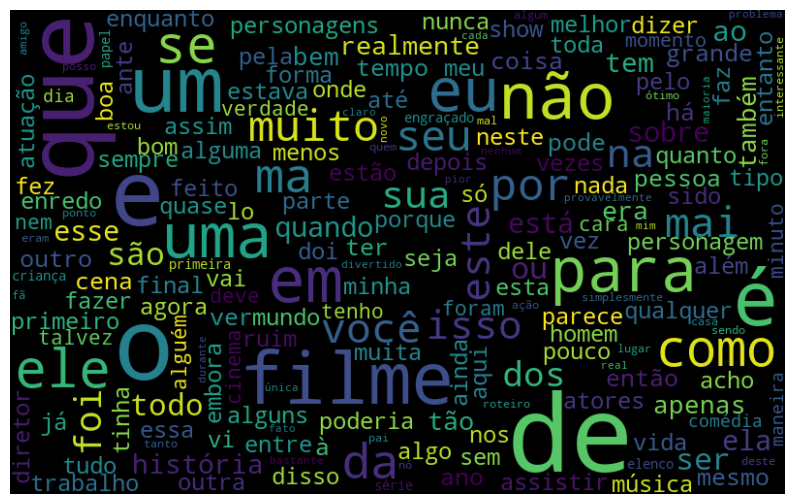

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all reviews into one string
all_words = ' '.join([text for text in reviews.text_pt])

# Generate the word cloud
word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

# Display the word cloud
plt.figure(figsize=(10,7))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [17]:
# type(all_words)
len(all_words)

63448424

In [18]:
def cloudWordsNegative(text, column_text):
    text_negative = text.query("sentiment == 'neg'")
    # Combine all reviews into one string
    all_words = ' '.join([text for text in text_negative[column_text]])

    # Generate the word cloud
    word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

    # Display the word cloud
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

def cloudWordsPositive(text, column_text):
    text_positive = text.query("sentiment == 'pos'")
    # Combine all reviews into one string
    all_words = ' '.join([text for text in text_positive[column_text]])

    # Generate the word cloud
    word_cloud = WordCloud(width=800, height=500, max_font_size=110, collocations=False).generate(all_words)

    # Display the word cloud
    plt.figure(figsize=(10,7))
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

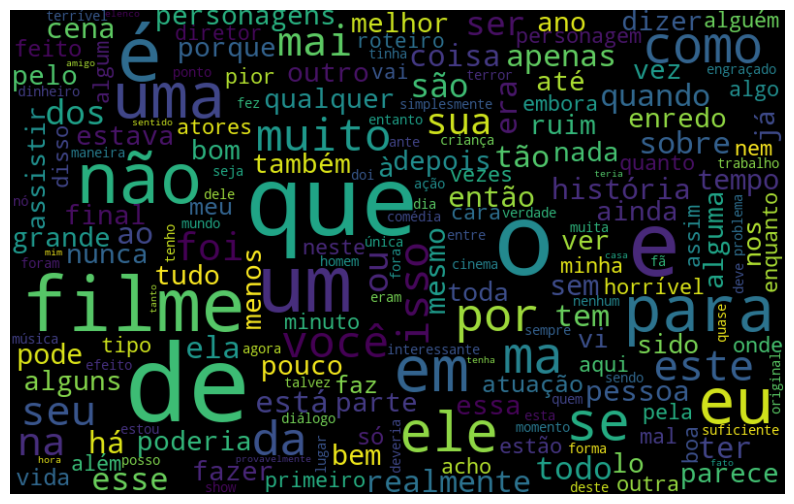

In [19]:
cloudWordsNegative(reviews,"text_pt")

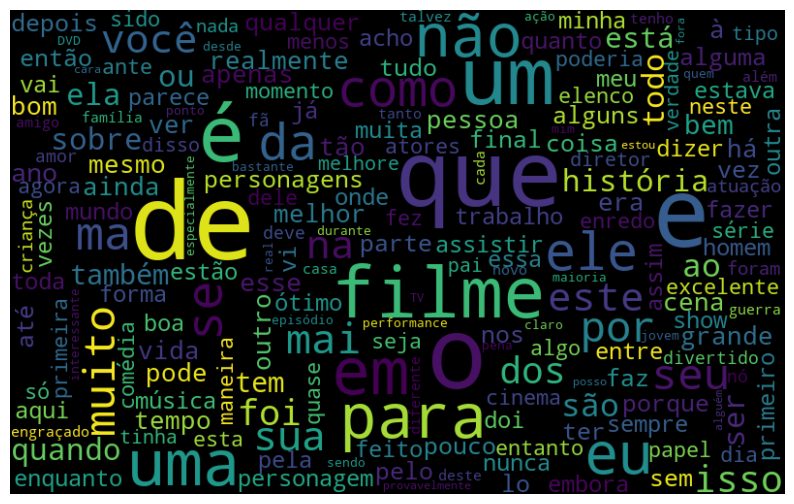

In [20]:
cloudWordsPositive(reviews,"text_pt")

In [21]:
token_space = tokenize.WhitespaceTokenizer()
token_reviews = token_space.tokenize(all_words)
frequency = nltk.FreqDist(token_reviews)
df_frequency = pd.DataFrame({
                                'Word': list(frequency.keys()),
                                'Frequency': list(frequency.values())
                            })
df_frequency.nlargest(columns= "Frequency", n = 5)


,Word,Frequency
20,de,417651
14,que,325070
42,e,299743
3,o,244881
7,um,216410


In [22]:
# def graphBar(df_frequency):
def graphBar(df, df_column, quantity):
    all_words = ' '.join([df for df in df[df_column]])
    token_space = tokenize.WhitespaceTokenizer()
    token_reviews = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_reviews)
    df_frequency = pd.DataFrame({
                                    'Word': list(frequency.keys()),
                                    'Frequency': list(frequency.values())
                                })
    df2 = df_frequency.nlargest(columns= "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df2, x= "Word", y = "Frequency", color = "gray")
    ax.set(ylabel = "Count")
    plt.show()

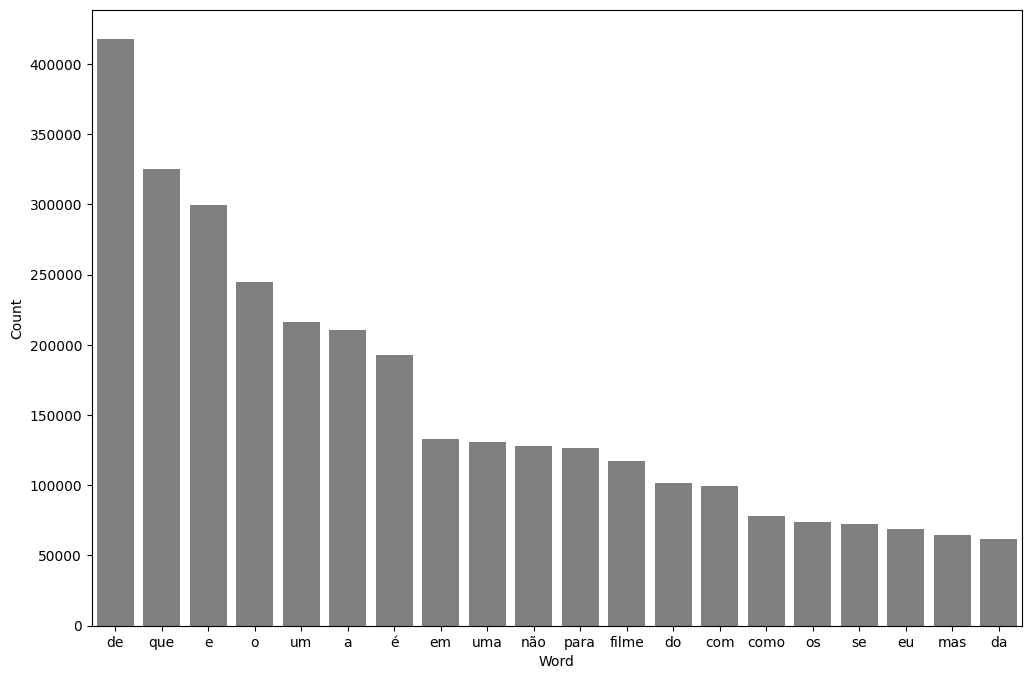

In [23]:
graphBar(reviews, "text_pt", 20)
# graphBar(df_frequency.nlargest(columns= "Frequency", n = 20))

In [24]:
irrelevant_word = nltk.corpus.stopwords.words("portuguese")
print(irrelevant_word)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [25]:
# reviews.drop(columns=['tratamento_1'], inplace=True)

In [26]:
# def removeStopWords(df):
#     irrelevant_word = nltk.corpus.stopwords.words("portuguese")
#     line_string = list()
#     for review in df.text_pt:
#         new_line = list()
#         token_space = tokenize.WhitespaceTokenizer()
#         new_line = token_space.tokenize(review)
#         for word in new_line:
#             if word not in irrelevant_word:
#                 new_line.append(word)
#         line_string.append(' '.join(new_line))
#     df['tratamento_1'] = line_string

# removeStopWords(reviews)

In [ ]:
# Second Version
def removeStopWords(df):
    # Load stopwords
    irrelevant_words = nltk.corpus.stopwords.words("portuguese")
    tokenizer = WhitespaceTokenizer()
    # Create a list to store the processed reviews
    line_string = []
    # Iterate through each review
    for review in df['text_pt']:
        # Tokenize the review into words
        words_line = tokenizer.tokenize(review)
        # Remove stopwords
        new_line = [word for word in words_line if word not in irrelevant_words]
        # Join the words back into a string and add to the list
        line_string.append(' '.join(new_line))
    # Add the processed reviews as a new column
    df['treatment'] = line_string

removeStopWords(reviews)


In [28]:
reviews.head(5)

,id,text_en,text_pt,sentiment,classification,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [29]:
def classification(df, df_column, df_column_classif, iteration):
    vetorize = CountVectorizer(max_features=iteration)
    bag_of_words = vetorize.fit_transform(df[df_column])
    bag_of_words.shape
    train, test, class_train, class_test = train_test_split(bag_of_words, df[df_column_classif], random_state = 42)
    # RegressionLogistic = LogisticRegression(max_iter=500)
    RegressionLogistic = LogisticRegression(max_iter=iteration,solver='saga')
    RegressionLogistic.fit(train, class_train)
    acuracy = RegressionLogistic.score(test, class_test)
    print(acuracy)

In [ ]:
classification(reviews, "treatment","classification",500)

0.8234532955923979


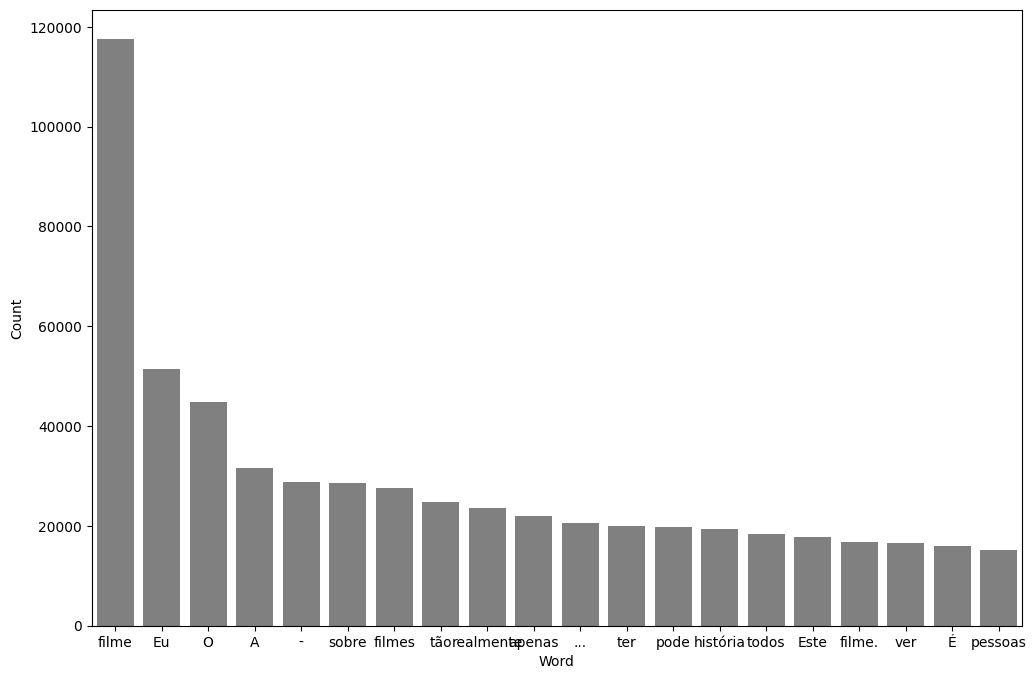

In [ ]:
graphBar(reviews,"treatment",20)

In [ ]:

# frase = "Os cursos da Alura são ótimos, além de ótimos, têm alunos ótimos!"
# token_espaco = WhitespaceTokenizer()
# token_pontuacao = WordPunctTokenizer()

# token_1 = token_espaco.tokenize(frase)
# token_2 = token_pontuacao.tokenize(frase)
# print(token_1)
# print(token_2)

['Os', 'cursos', 'da', 'Alura', 'são', 'ótimos,', 'além', 'de', 'ótimos,', 'têm', 'alunos', 'ótimos!']
['Os', 'cursos', 'da', 'Alura', 'são', 'ótimos', ',', 'além', 'de', 'ótimos', ',', 'têm', 'alunos', 'ótimos', '!']


In [81]:
def treatmentsToClean(df, df_column):
    token_punctuation = WordPunctTokenizer()
    stemmer = nltk.RSLPStemmer()

    # Aggregate a DataFrame List of Punctuation to remove
    characters_and_words_to_remove = []
    for punct in punctuation:
        characters_and_words_to_remove.append(punct)

    # Aggregate a DataFrame List of Punctuation + Irrelevant Words to remove
    characters_and_words_to_remove = characters_and_words_to_remove + irrelevant_word

    # Aggregate a DataFrame List of Punctuation + Irrelevant Words to remove + Words without Accents
    characters_and_words_to_remove = [unidecode.unidecode(review) for review in characters_and_words_to_remove]

    new_review_ok = []
    for review in df[df_column]:
        new_review = []
        review = review.lower()
        words_review = token_punctuation.tokenize(review)
        for word in words_review:
            if word not in characters_and_words_to_remove:
                # Alter eath word for their prefix with the "nltk.RSLPStemmer.stem(word)"
                new_review.append(stemmer.stem(word))
        new_review_ok.append(' '.join(new_review))

    df[df_column] = new_review_ok

In [82]:
treatmentsToClean(reviews,'tratamento_1')

In [78]:
classification(reviews, "text_pt","classification",500)

0.8274160938131824


In [83]:
classification(reviews, "tratamento_1","classification",500)

0.8381722604124545


In [ ]:
# stemmer = nltk.RSLPStemmer()
# a = stemmer.stem("corredor")
# b = stemmer.stem("corre")
# c = stemmer.stem("correria")
# d = stemmer.stem("correlacionado")
# e = stemmer.stem("corrimão")
# print(a,b,c,d,e)

corr corr corr correlacion corrim


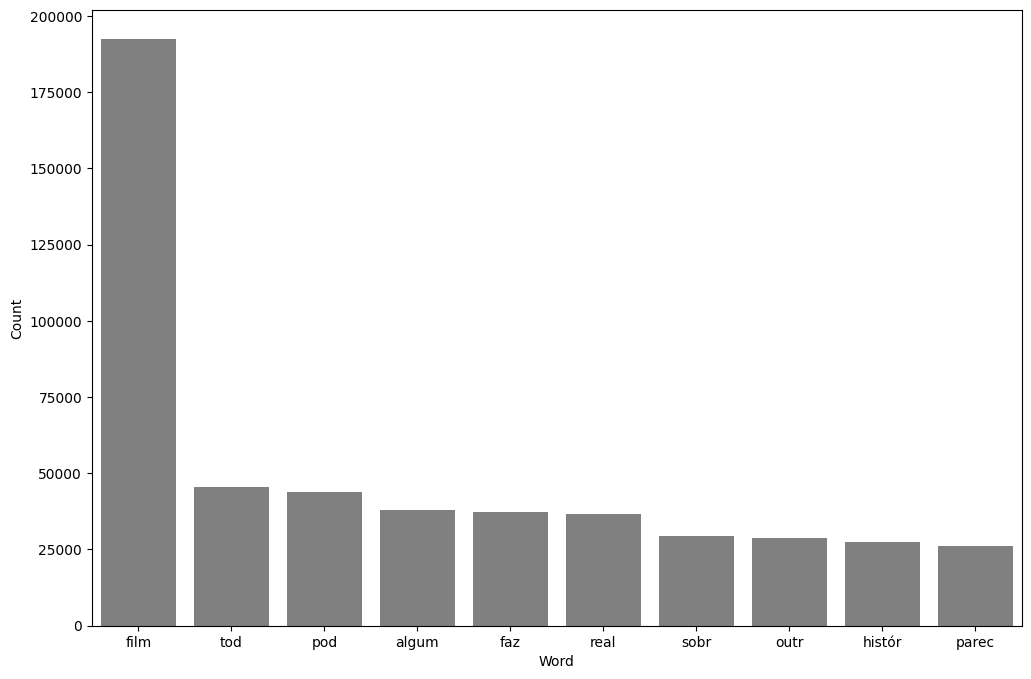

In [85]:
graphBar(reviews,'tratamento_1',10)